In [1]:
import os
import sys
from importlib import reload
from pathlib import Path

import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
root = Path(os.getcwd()).parent
sys.path.append(
    (root / "src").as_posix()
)

In [4]:
import schema.configs as config_module

reload(config_module)

PathConfig = config_module.PathConfig

In [5]:
path_config = PathConfig(data_root="../data")
DATASET_NAME = "synthetic_test"

## Parameters

In [6]:
N_SAMPLES       = 5_000
N_CLUSTERS      = 10
D_DESCRIPTIVE   = 10
D_SPATIAL       = 2

ALPHA = 0.8
NN = 10
TARGET_NOISE = 0.05

In [7]:
def target_neighbor_corr(spatial_data: np.ndarray, target: np.ndarray) -> float:
    nbrs = NearestNeighbors(n_neighbors=NN+1).fit(spatial_data)
    nbrs_indices = nbrs.kneighbors(spatial_data, return_distance=False)

    neighbor_means = np.array([
        target[neigh[1:]].mean() for neigh in nbrs_indices
    ])

    return np.corrcoef(target, neighbor_means)[0, 1]

## Generation

#### TYPE 1

In [82]:
spatial_features = np.random.uniform(-2, 2, size=(N_SAMPLES, D_SPATIAL))
descriptive = np.random.uniform(-2, 2, size=(N_SAMPLES, D_DESCRIPTIVE))
centroids = np.random.uniform(-2, 2, size=(N_CLUSTERS, D_SPATIAL))

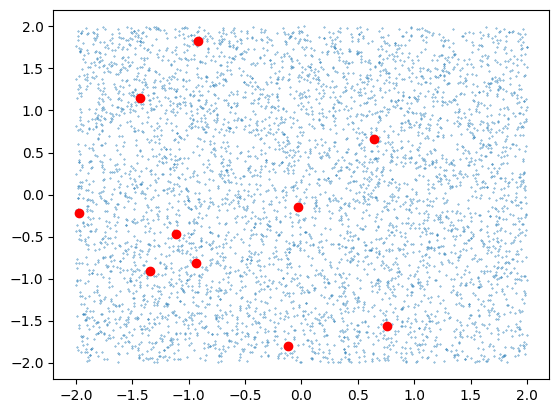

In [158]:
plt.scatter(*spatial.T, s=0.1)
plt.scatter(*centroids.T, c="red")

In [166]:
from scipy.spatial.distance import cdist

distances = cdist(spatial, centroids)
inv_dist = 1 / (distances + 1e-6)
spatial_score = inv_dist.min(axis=1)

In [ ]:
alpha = 0.7

desc_signal = descriptive[:, 0]
neighbor_signal = np.array([
    descriptive[nbrs[i], 0].mean()
    for i in range(N)
])

target = alpha * neighbor_signal + (1 - alpha) * desc_signal

In [170]:
desc_w = np.random.uniform(-1, 1, size=D_DESCRIPTIVE)
desc_score = descriptive @ desc_w

target = np.tanh(ALPHA * spatial_score + (1 - ALPHA) * desc_score + np.random.normal(0, 1, size=N_SAMPLES))

In [171]:
assert spatial.shape[0] == descriptive.shape[0] == target.shape[0]

with open(path_config.data_root / "processed/np/synth_test.npz", "xb") as f:
    np.savez(
        f,
        data=descriptive,
        target=target,
        spatial=spatial,
    )

---
#### TYPE 2 

`SPATIAL`

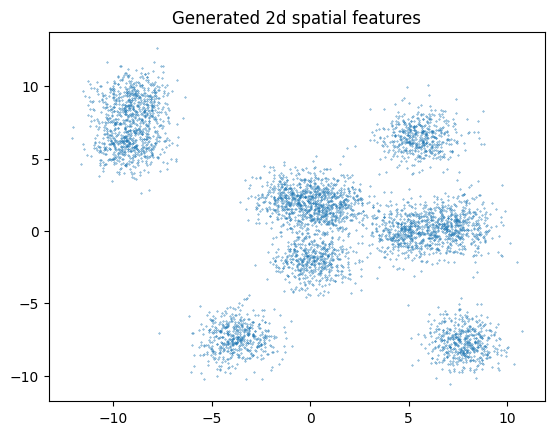

In [98]:
spatial_features, assignement = skl.datasets.make_blobs(N_SAMPLES, centers=N_CLUSTERS, n_features=D_SPATIAL, cluster_std=1)

plt.title("Generated 2d spatial features")
plt.scatter(*spatial_features.T, s=0.1)

In [ ]:
# BASE SPIRAL

# N = 1000
# theta = np.linspace(0, 4 * np.pi, N)
# r = np.linspace(0.2, 1, N)

# x = r * np.cos(theta)
# y = r * np.sin(theta)
# spiral_points = np.stack([x, y], axis=1)


# CLUSTER CENTERS ALONG THE SPIRAL

# n_clusters = 15
# rng = np.random.default_rng(42)
# center_indices = rng.choice(N, size=n_clusters, replace=False)
# cluster_centers = spiral_points[center_indices]


# POINTS AROUND EACH CENTER

# points_per_cluster = 20
# cluster_std = 0.02
# all_clusters = []

# for center in cluster_centers:
#     cluster = rng.normal(loc=center, scale=cluster_std, size=(points_per_cluster, 2))
#     all_clusters.append(cluster)

# cluster_points = np.vstack(all_clusters)


# COMBINE SPIRAL AND CLUSTER

# spatial_features = np.vstack([spiral_points, cluster_points])
# n_total = spatial_features.shape[0]

# # Optional: label original spiral vs clusters
# labels = np.array([0]*N + [1]*len(cluster_points))

# plt.figure(figsize=(6, 6))
# plt.scatter(spatial_featur(loc=center, scale=cluster_std, size=(points_per_cluster, 2))
#     all_clusters.append(cluster)

# cluster_points = np.vstack(all_clusters)


# COMBINE SPIRAL AND CLUSTER

# spatial_features = np.vstack([spiral_points, cluster_points])
# n_total = spatial_features.shape[0]


---
`DESCRIPTIVE`

In [108]:
descriptive_features = np.random.uniform(-1, 1, size=(N_SAMPLES, D_DESCRIPTIVE))

In [ ]:
# enc = OneHotEncoder()
# desc_cluster_id_1hot = enc.fit_transform(assignement.reshape(-1, 1))


# cluster_centers = np.array([
#     spatial_features[assignement == i].mean(axis=0)
#     for i in range(N_CLUSTERS)
# ])
# local_offsets = spatial_features - cluster_centers[assignement]


# densities = np.array([
#     1.0 / (
#         np.linalg.norm(
#             spatial_features[assignement == i] - cluster_centers[i],
#             axis=1,
#         ).mean()
#         + 1e-5
#     )
#     for i in range(N_CLUSTERS)
# ])
# desc_density = densities[assignement].reshape(-1, 1)

# desc_noise = np.random.normal(0, 1, size=(N_SAMPLES, 2))

# descriptive_features = np.hstack([
#     desc_cluster_id_1hot.toarray(),
#     local_offsets,
#     desc_density,
#     desc_noise,
# ])

---
`TARGET`

In [ ]:
# # DESCRIPTIVE COMPONENT
# desc_part = (
#     0.6 * descriptive_features[:, 0] +
#     0.3 * np.sin(descriptive_features[:, 1 % D_DESCRIPTIVE]) +
#     0.2 * np.tanh(descriptive_features[:, 2 % D_DESCRIPTIVE])
# )

# desc_part = 0
# for i in range(D_DESCRIPTIVE):
#     weight = 0.6 / D_DESCRIPTIVE

#     if i % 3 == 0:
#         desc_part += weight * descriptive_features[:, i]
#     elif i % 3 == 1:
#         desc_part += weight * np.sin(descriptive_features[:, i])
#     else:
#         desc_part += weight * np.tanh(descriptive_features[:, i])


# # SPATIAL COMPNENT
# nn = NearestNeighbors(n_neighbors=NN+1).fit(spatial_features)
# neighbors = nn.kneighbors(return_distance=False)

# spatial_diff = spatial_features - spatial_features[neighbors].mean(axis=1)
# spatial_part = (
#     0.3 * np.sin(spatial_diff[:, 0] * 3) +
#     0.2 * spatial_diff[:, 1] ** 2
# )


# # INTERACTION COMPONENT
# interact_part = 0.2 * descriptive_features[:, 0] * spatial_diff[:, 1]

In [121]:
# target = desc_part + spatial_part + interact_part
# target += np.random.normal(0, TARGET_NOISE, size=N_SAMPLES)

# # STD
# target = (target - target.mean()) / target.std()

__OPTION 1: CLUSTER BASE + DESC NOISE__

In [61]:
cluster_base = np.random.uniform(-2, 2, size=N_CLUSTERS)
w = np.random.randn(descriptive_features.shape[1]) * 0.1

desc_noise = descriptive_features @ w
target = cluster_base[assignement] + desc_noise + np.random.normal(0, 1, size=N_SAMPLES)

In [62]:
print(
    f"Neighborhood x Target correlation: {target_neighbor_corr(spatial_features, target)}"
)

Neighborhood x Target correlation: 0.6406490681154857


In [ ]:
assert spatial_features.shape[0] == descriptive_features.shape[0] == target.shape[0]

with open(path_config.data_root / "processed/np/synth_cluster_base.npz", "xb") as f:
    np.savez(
        f,
        data=scaler.fit_transform(np.hstack((descriptive_features, spatial_features))),
        target=scaler.fit_transform(target.reshape(-1, 1)).squeeze(),
        spatial=scaler.fit_transform(spatial_features),
    )

__OPTION 2: SMOOTH SPATIAL FUNC + DESC NOISE__

In [113]:
f_spatial = np.sin(spatial_features[:, 0]) + np.cos(spatial_features[:, 1])

nbrs = NearestNeighbors(n_neighbors=NN+1).fit(spatial_features)
neighbors = nbrs.kneighbors(spatial_features, return_distance=False)[:, 1:]

w = np.random.randn(descriptive_features.shape[1])
agg_neigh_desc = descriptive_features[neighbors].mean(axis=1)

target = f_spatial + (agg_neigh_desc @ w) + np.random.normal(0, 0.5, size=N_SAMPLES)

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [109]:
w = np.random.randn(descriptive_features.shape[1]) * 0.1

f_spatial = np.sin(spatial_features[:, 0]) + np.cos(spatial_features[:, 1])
desc_noise = descriptive_features @ w

target = f_spatial + desc_noise + np.random.normal(0, 1, size=N_SAMPLES)

In [115]:
assert spatial_features.shape[0] == descriptive_features.shape[0] == target.shape[0]

with open(path_config.data_root / "processed/np/synth_smooth.npz", "xb") as f:
    np.savez(
        f,
        data=scaler.fit_transform(np.hstack((descriptive_features, spatial_features))),
        target=scaler.fit_transform(target.reshape(-1, 1)).squeeze(),
        spatial=scaler.fit_transform(spatial_features),
    )

In [116]:
print(
    f"Neighborhood x Target correlation: {target_neighbor_corr(spatial_features, target)}"
)

Neighborhood x Target correlation: 0.8575072891017498


In [40]:
from sklearn.metrics import r2_score

neigh_max = np.mean(descriptive_features[neighbors], axis=1)

print(
    r2_score(target, neigh_max @ w),
    r2_score(target, descriptive_features @ w)
)

0.6240349798157057 -0.3291251251816285


In [97]:
descriptive_features[neighbors].shape

(5000, 10, 10)

__OPTION 3: SPATIAL NEIGHBORHOOD AGGREGATE__ 

In [88]:
w = np.random.randn(descriptive_features.shape[1]) * 0.2

nn = NearestNeighbors(n_neighbors=NN+1).fit(spatial_features)
neighbors = nn.kneighbors(spatial_features, return_distance=False)[:, 1:]

target = np.zeros(N_SAMPLES)
for i in range(N_SAMPLES):
    nbrs = neighbors[i]
    avg_desc = descriptive_features[nbrs].mean(axis=0)
    target[i] = avg_desc @ w + np.random.normal(0, 1)

In [89]:
print(
    f"Neighborhood x Target correlation: {target_neighbor_corr(spatial_features, target)}"
)

Neighborhood x Target correlation: 0.32930190569796625


In [90]:
scaler = StandardScaler()

In [91]:
assert spatial_features.shape[0] == descriptive_features.shape[0] == target.shape[0]

with open(path_config.data_root / "processed/np/synth_aggregate.npz", "xb") as f:
    np.savez(
        f,
        data=scaler.fit_transform(np.hstack((descriptive_features, spatial_features))),
        target=scaler.fit_transform(target.reshape(-1, 1)).squeeze(),
        spatial=scaler.fit_transform(spatial_features),
    )

__OPTION 5: PROPAGATION__

In [56]:
w = np.random.randn(descriptive_features.shape[1]) * 0.2
target = np.zeros(N_SAMPLES)

nn = NearestNeighbors(n_neighbors=NN+1).fit(spatial_features)
neighbors = nn.kneighbors(spatial_features, return_distance=False)[:, 1:]

# Step 1: Seed some node values
seed_ratio = 0.05
seeds = np.random.choice(N_SAMPLES, int(seed_ratio * N_SAMPLES), replace=False)
target[seeds] = descriptive_features[seeds] @ w + np.random.randn(len(seeds))

# Step 2: Propagate to neighbors
for _ in range(5):  # Number of propagation steps
    target = np.array([
        target[neighbors[i]].mean() for i in range(N_SAMPLES)
    ]) + np.random.normal(0, 0.1, size=N_SAMPLES)  # Optional noise


In [57]:
print(
    f"Neighborhood x Target correlation: {target_neighbor_corr(spatial_features, target)}"
)

Neighborhood x Target correlation: 0.44193801231488067


In [59]:
assert spatial_features.shape[0] == descriptive_features.shape[0] == target.shape[0]

with open(path_config.data_root / "processed/np/synth_propagate.npz", "xb") as f:
    np.savez(
        f,
        data=scaler.fit_transform(descriptive_features),
        target=scaler.fit_transform(target.reshape(-1, 1)).squeeze(),
        spatial=scaler.fit_transform(spatial_features),
    )

## Combining and saving

In [85]:
with open(path_config.data_root / "processed/np" / DATASET_NAME, "xb") as f:
    np.savez(
        f,
        data=descriptive_features,
        target=target,
        spatial=spatial_features,
    )